For this project, we will examine data from the World Happiness Project (2021). 

What we will examine: 

1) Analyze the data and describe it. Describe the factors that went into deciding whether the quality of life was good or bad in a country, the way that the data was collected, which countries were included, and any potential issues with the data. 

2) Do some exploratory data analysis (eda) for example, different plots for the happiness score vs. region or year, and looking at correlation. 

2) Next we will form some hypotheses. For example we might hypothesize that air quality contributes to happiness, or that poverty is a contributing factor. 

3) We will use linear and possibly other types of regression to analyze the data and decide how likely it is that these factors play a role. 

4) We will create some visualizations in streamlit. I hope to do something with countries on a map. 



*italicized text*
The features in this data set (the World Happiness report from the United Nations) are the following: 

    * GPD per capita (a measure of the economic output of a country divided by the population), measured in US dollars. 
    
    * Social support (having someone to rely on in times of need), measured on a 0 to 10 scale, 
    
    * Healthy life expectancy, reported as the expected number of years of life in good health, based on data from the World Health Organization (WHO). 
    
    * Freedom to make life choices (The question from the survey was "Are you satisfied or dissatisfied with your freedom to choose what you do with your life?"), measured on a 0 to 10 scale. 
    
    * Generosity (a measure of recent donations in a country's population). To determine generosity, the survey asked people whether they had donated money to a charity in the last month, measured on a 0 to 10 scale. 

    * Perception of corruption (the survey asked "Is corruption widespread throughout the government or not?"). The question was intended to measure subjective perceptions of corruption in their country, rather than objective measures of corruption such as the number of prosecutions or convictions. 


   ## 3.2: Univariate Analysis




```
# Description: The happiness scores and rankings use data from the Gallup World Poll. The scores are based on 
    answers to the main life evaluation question asked in the poll. This question, known as the Cantril 
    ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the 
    worst possible life being a 0 and to rate their own current lives on that scale. The scores are from 
    nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates 
    representative. The columns following the happiness score estimate the extent to which each of six factors 
    – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – 
    contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical 
    country that has values equal to the world’s lowest national averages for each of the six factors. They
    have no impact on the total score reported for each country, but they do explain why some countries 
    rank higher than others.
#    
```



In [1]:
# Import necessary libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV
from seaborn import heatmap 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import plotly.express as px
from matplotlib import rcParams
from sklearn.model_selection import KFold
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Import google drive (where the csv files are stored), and import the data sets. Label the data sets by year 
# (2015-2019). 
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
cd "/content/drive/My Drive/Colab Notebooks/Project Data"

/content/drive/My Drive/Colab Notebooks/Project Data


In [4]:
ls

whr2021.csv


In [5]:
df_2021= pd.read_csv('whr2021.csv')


In [6]:
# Inspect the data. We start by looking at the number of rows and columns 

print(df_2021.shape)
print("Rows:", df_2021.shape[0])
print("Columns:", df_2021.shape[1])

(149, 20)
Rows: 149
Columns: 20


In [7]:
# Now we look at the first five rows of the data set. 
df_2021.head()

# We can see that the countries are ordered by happiness rank, and Switzerland was the happiest country in 2015. 

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [8]:
# Summary of the data set: 
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [9]:
# We will eliminate the spaces in the column names by renaming them: 
df_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [10]:
df_2021 = df_2021.rename(columns = {'Country name':'Country_Name', 'Regional indicator':'Regional_Indicator', 
                                    'Ladder score':'Ladder_Score', 'Standard error of ladder score':'Standard_Error_Ladder_Score', 
                                    'upperwhisker':'Upper_Whisker', 'lowerwhisker':'Lower_Whisker', 'Logged GDP per capita':'Logged_GDP_per_capita',
                                    'Social support':'Social_Support', 'Healthy life expectancy':'Healthy_Life_Expectancy',
                                    'Freedom to make life choices':'Freedom_To_Make_Life_Choices', 'Generosity':'Generosity',
                                    'Perceptions of corruption':'Perceptions_of_Corruption', 'Ladder score in Dystopia':'Ladder_Score_In_Dystopia',
                                    'Explained by: Log GDP per capita':'Explained_by:Log_GDP_per_capita', 'Explained by: Social support':'Explained_by:Social_Support',
                                    'Explained by: Healthy life expectancy':'Explained_by:Healthy_Life_Expectancy',
                                    'Explained by: Freedom to make life choices':'Explained_by:Freedom_to_make_life_choices',
                                    'Explained by: Generosity':'Explained_by:Generosity', 'Explained by: Perceptions of corruption':'Explained_by:Perceptions_of_corruption',
                                    'Dystopia + residual':'Dystopia+Residual'})

In [11]:
df_2021.columns

Index(['Country_Name', 'Regional_Indicator', 'Ladder_Score',
       'Standard_Error_Ladder_Score', 'Upper_Whisker', 'Lower_Whisker',
       'Logged_GDP_per_capita', 'Social_Support', 'Healthy_Life_Expectancy',
       'Freedom_To_Make_Life_Choices', 'Generosity',
       'Perceptions_of_Corruption', 'Ladder_Score_In_Dystopia',
       'Explained_by:Log_GDP_per_capita', 'Explained_by:Social_Support',
       'Explained_by:Healthy_Life_Expectancy',
       'Explained_by:Freedom_to_make_life_choices', 'Explained_by:Generosity',
       'Explained_by:Perceptions_of_corruption', 'Dystopia+Residual'],
      dtype='object')

In [12]:
# I don't plan to use the columns Standard error of ladder score, upper whisker, lower whisker, and the explained by columns, so I will remove them from the data frame: 
df_2021 = df_2021.drop(['Standard_Error_Ladder_Score', 'Explained_by:Log_GDP_per_capita','Explained_by:Social_Support',
                        'Explained_by:Healthy_Life_Expectancy','Explained_by:Freedom_to_make_life_choices','Explained_by:Generosity',
                        'Explained_by:Perceptions_of_corruption','Dystopia+Residual'],axis=1)

In [13]:
df_2021.columns

Index(['Country_Name', 'Regional_Indicator', 'Ladder_Score', 'Upper_Whisker',
       'Lower_Whisker', 'Logged_GDP_per_capita', 'Social_Support',
       'Healthy_Life_Expectancy', 'Freedom_To_Make_Life_Choices', 'Generosity',
       'Perceptions_of_Corruption', 'Ladder_Score_In_Dystopia'],
      dtype='object')

In [14]:
# Describe the data set for 2021:
df_2021.describe()

,Ladder_Score,Upper_Whisker,Lower_Whisker,Logged_GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Ladder_Score_In_Dystopia
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00
mean,5.532839,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43
std,1.073924,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00
min,2.523000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43
25%,4.852000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43
50%,5.534000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43
75%,6.255000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43
max,7.842000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43


In [15]:
# Now we will inspect the null values for each of the datasets: 
df_2021.isnull().sum()

Country_Name                    0
Regional_Indicator              0
Ladder_Score                    0
Upper_Whisker                   0
Lower_Whisker                   0
Logged_GDP_per_capita           0
Social_Support                  0
Healthy_Life_Expectancy         0
Freedom_To_Make_Life_Choices    0
Generosity                      0
Perceptions_of_Corruption       0
Ladder_Score_In_Dystopia        0
dtype: int64

In [16]:
# First we find the five happiest countries: a) 
sorted_2021 = df_2021.sort_values(by='Ladder_Score', ascending = False)
top_five_2021 = sorted_2021.head(5)

In [17]:
print(top_five_2021)

  Country_Name Regional_Indicator  Ladder_Score  Upper_Whisker  Lower_Whisker  \
0      Finland     Western Europe         7.842          7.904          7.780   
1      Denmark     Western Europe         7.620          7.687          7.552   
2  Switzerland     Western Europe         7.571          7.643          7.500   
3      Iceland     Western Europe         7.554          7.670          7.438   
4  Netherlands     Western Europe         7.464          7.518          7.410   

   Logged_GDP_per_capita  Social_Support  Healthy_Life_Expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom_To_Make_Life_Choices  Generosity  Perceptions_of_Corruption  \
0                       

# The five "happiest" countries are Finland, Denmark, Norway, Iceland, and the Netherlands. 


In [18]:
# Find out if there are any outliers: 
(df_2021['Healthy_Life_Expectancy']).describe()

count    149.000000
mean      64.992799
std        6.762043
min       48.478000
25%       59.802000
50%       66.603000
75%       69.600000
max       76.953000
Name: Healthy_Life_Expectancy, dtype: float64

These values seem reasonable, and there don't seem to be any outliers among life expectancy. 

### Analysis

In [19]:
# Find correlation between the variables and the ladder score: 
correlations = df_2021.corr()['Ladder_Score'].sort_values()

In [20]:
# Display correlation: 
print('\nMost Negative Correlation:\n', correlations.head(15))


Most Negative Correlation:
 Perceptions_of_Corruption      -0.421140
Generosity                     -0.017799
Freedom_To_Make_Life_Choices    0.607753
Social_Support                  0.756888
Healthy_Life_Expectancy         0.768099
Logged_GDP_per_capita           0.789760
Upper_Whisker                   0.999347
Lower_Whisker                   0.999396
Ladder_Score                    1.000000
Ladder_Score_In_Dystopia             NaN
Name: Ladder_Score, dtype: float64


What stands out here is that there is a strong correlation between happiness and healthy life expectancy, social support, freedom to make life choices, and a negative correlation between perceptions of corruption and happiness. 

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Univariate Analysis

In [22]:
def univariate(df,col,hue =None):
    sns.set(style="darkgrid")
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
    
    if len(temp.unique()) > 0:
        for p in ax.patches:
            ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df_2015))), (p.get_x()+0.05, p.get_height()))  
    else:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+0.5)) 
    del temp
    
    plt.xticks(rotation=45)  
    plt.show()

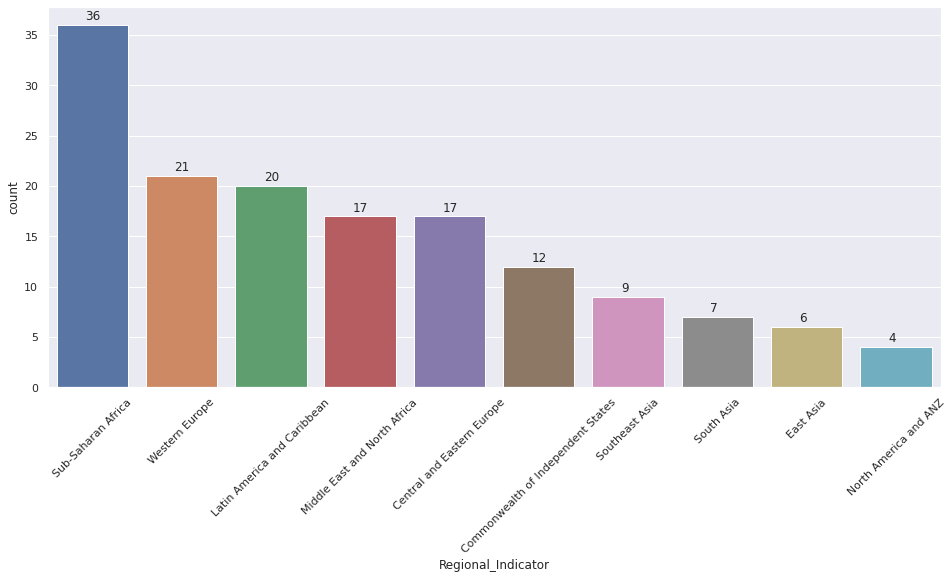

In [23]:
# Let's check out to which region each country in the 2021 dataset belongs: 
univariate(df = df_2021, col= 'Regional_Indicator')

Here we can see that the region with the most countries is Sub-Saharan Africa, and the region with the least countries is North American and ANZ (Australia and New Zealand).

Continuous Variables

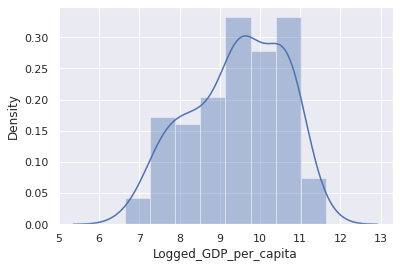

In [24]:
# Let's look at the distribution of GDP per Capita (gross domestic product per capita): 

sns.distplot(df_2021['Logged_GDP_per_capita']);

To Do: Look at data set and explain this graph: 

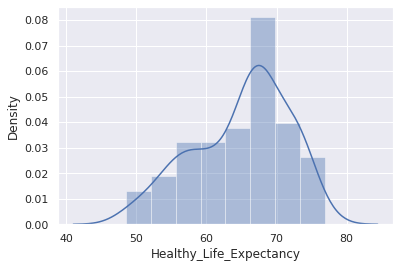

In [25]:
# Let's look at the distribution of life expectancy to see about health: 
sns.distplot(df_2021['Healthy_Life_Expectancy']);

It looks like the density, which means the number of countries having life expectancy within that range, is highest for about 68-70 years old. There arent really any countries where the life expectancy is more than 78 or less than 48. 

Bivariate Analysis

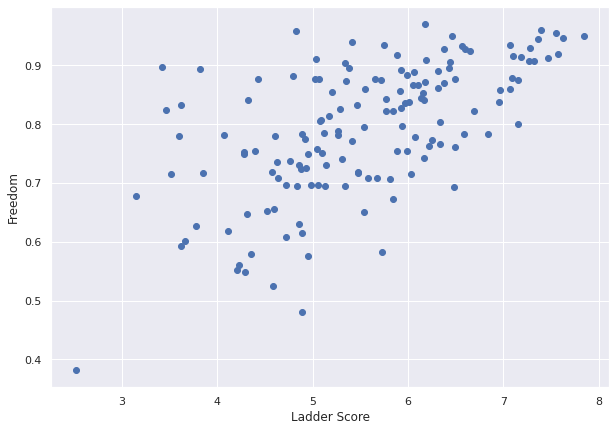

In [26]:
# Let's check out how the happiness score correlates with freedom through a scatterplot: 
plt.figure(figsize=(10,7))

plt.scatter(df_2021['Ladder_Score'], df_2021['Freedom_To_Make_Life_Choices'])

plt.xlabel('Ladder Score'); plt.ylabel('Freedom');

plt.show()


There seems to be a positive relationship between the ladder score and freedom. The correlation seems to get a bit tighter for higher values of the ladder score. For example, there is a lot of variation in freedom scores for a ladder score of 5, but for a ladder score of 8 there is quite a bit less variation in freedom (there is high freedom for all very happy countries). 

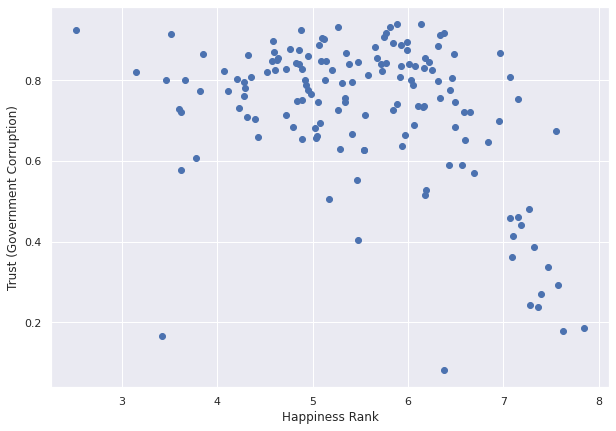

In [27]:
# Let's check out the relationship between trust in government and the ladder score: 

plt.figure(figsize=(10,7))

plt.scatter(df_2021['Ladder_Score'], df_2021['Perceptions_of_Corruption'])

plt.xlabel('Happiness Rank'); plt.ylabel('Trust (Government Corruption)');

plt.show()

There doesn't seem to be much of a relationship between trust in government and happiness. 

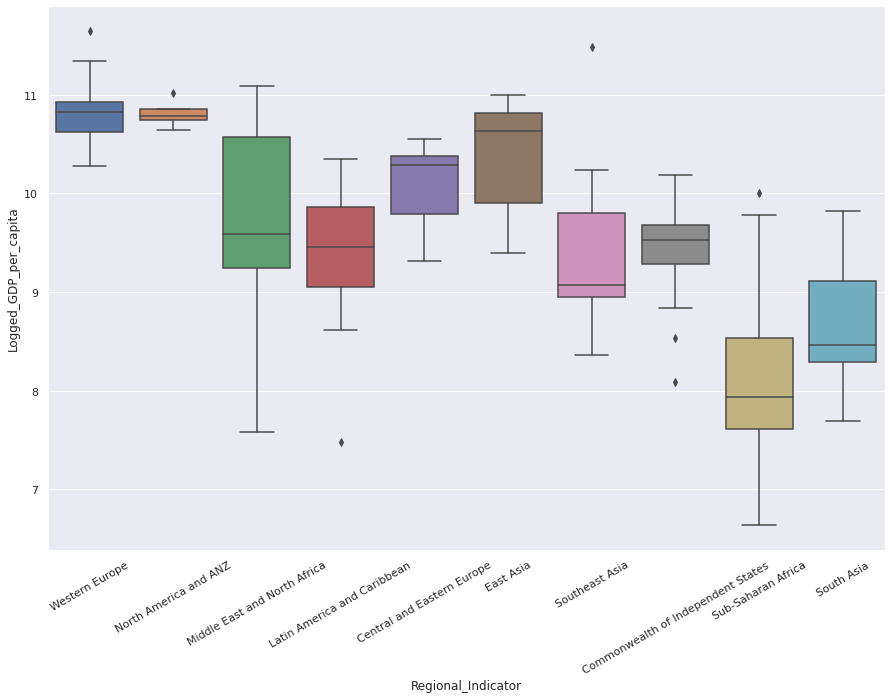

In [28]:
# Let's examine the distribution of the gdp (economy) according to region: 
plt.figure(figsize=(15,10))
sns.boxplot(df_2021['Regional_Indicator'], df_2021['Logged_GDP_per_capita'], data=df_2021)
plt.xticks(rotation = 30)
plt.show()


We can see that there is a lot of variation in gdp in countries in the Middle East and North Africa, but very less variation in gdp in North America and Australia/New Zealand. 

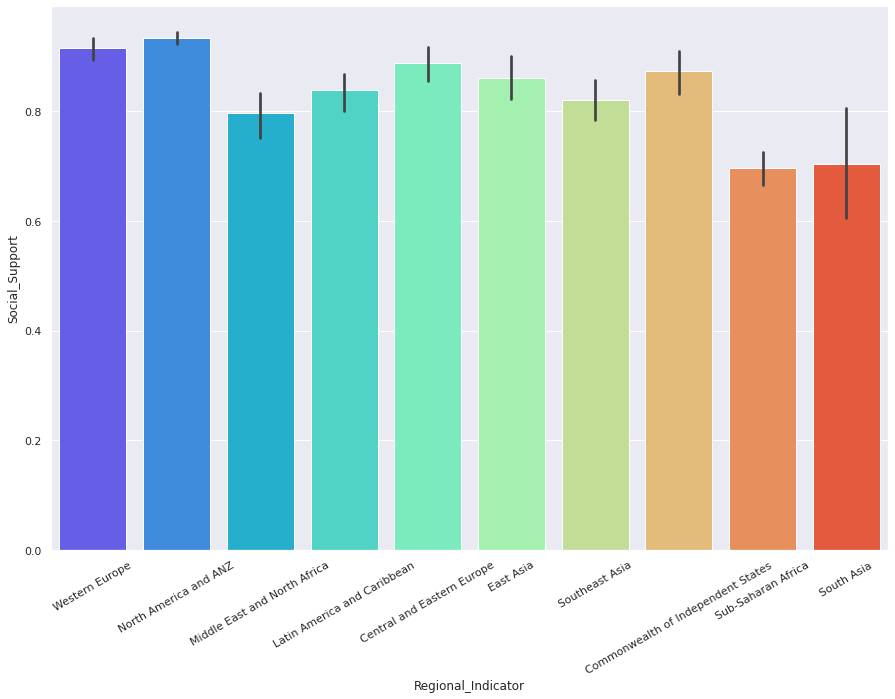

In [29]:
# Let's look at the distribution of region and social support

plt.figure(figsize=(15,10))

sns.barplot(x='Regional_Indicator', y='Social_Support',data=df_2021, palette='rainbow')

plt.xticks(rotation = 30)

plt.show()

# Australia and New Zealand region has the highest satisfaction of people with their friends and family while Southern Asia is the least

Western Eurpose has the highest social support, and South Asia the lowest. 

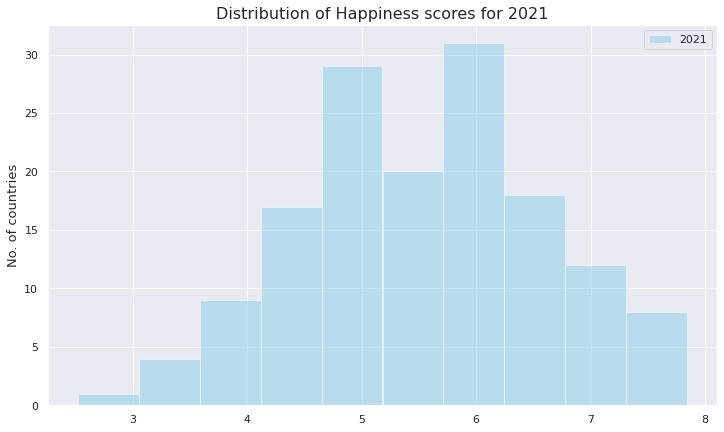

In [30]:
plt.figure(figsize=(12,7))

a=10

plt.hist(df_2021["Ladder_Score"], a, label='2021', alpha=0.5, color='skyblue')

plt.ylabel('No. of countries', size=13)

plt.legend(loc='upper right')

plt.title('Distribution of Happiness scores for 2021', size=16)

plt.show()

<Figure size 720x504 with 0 Axes>

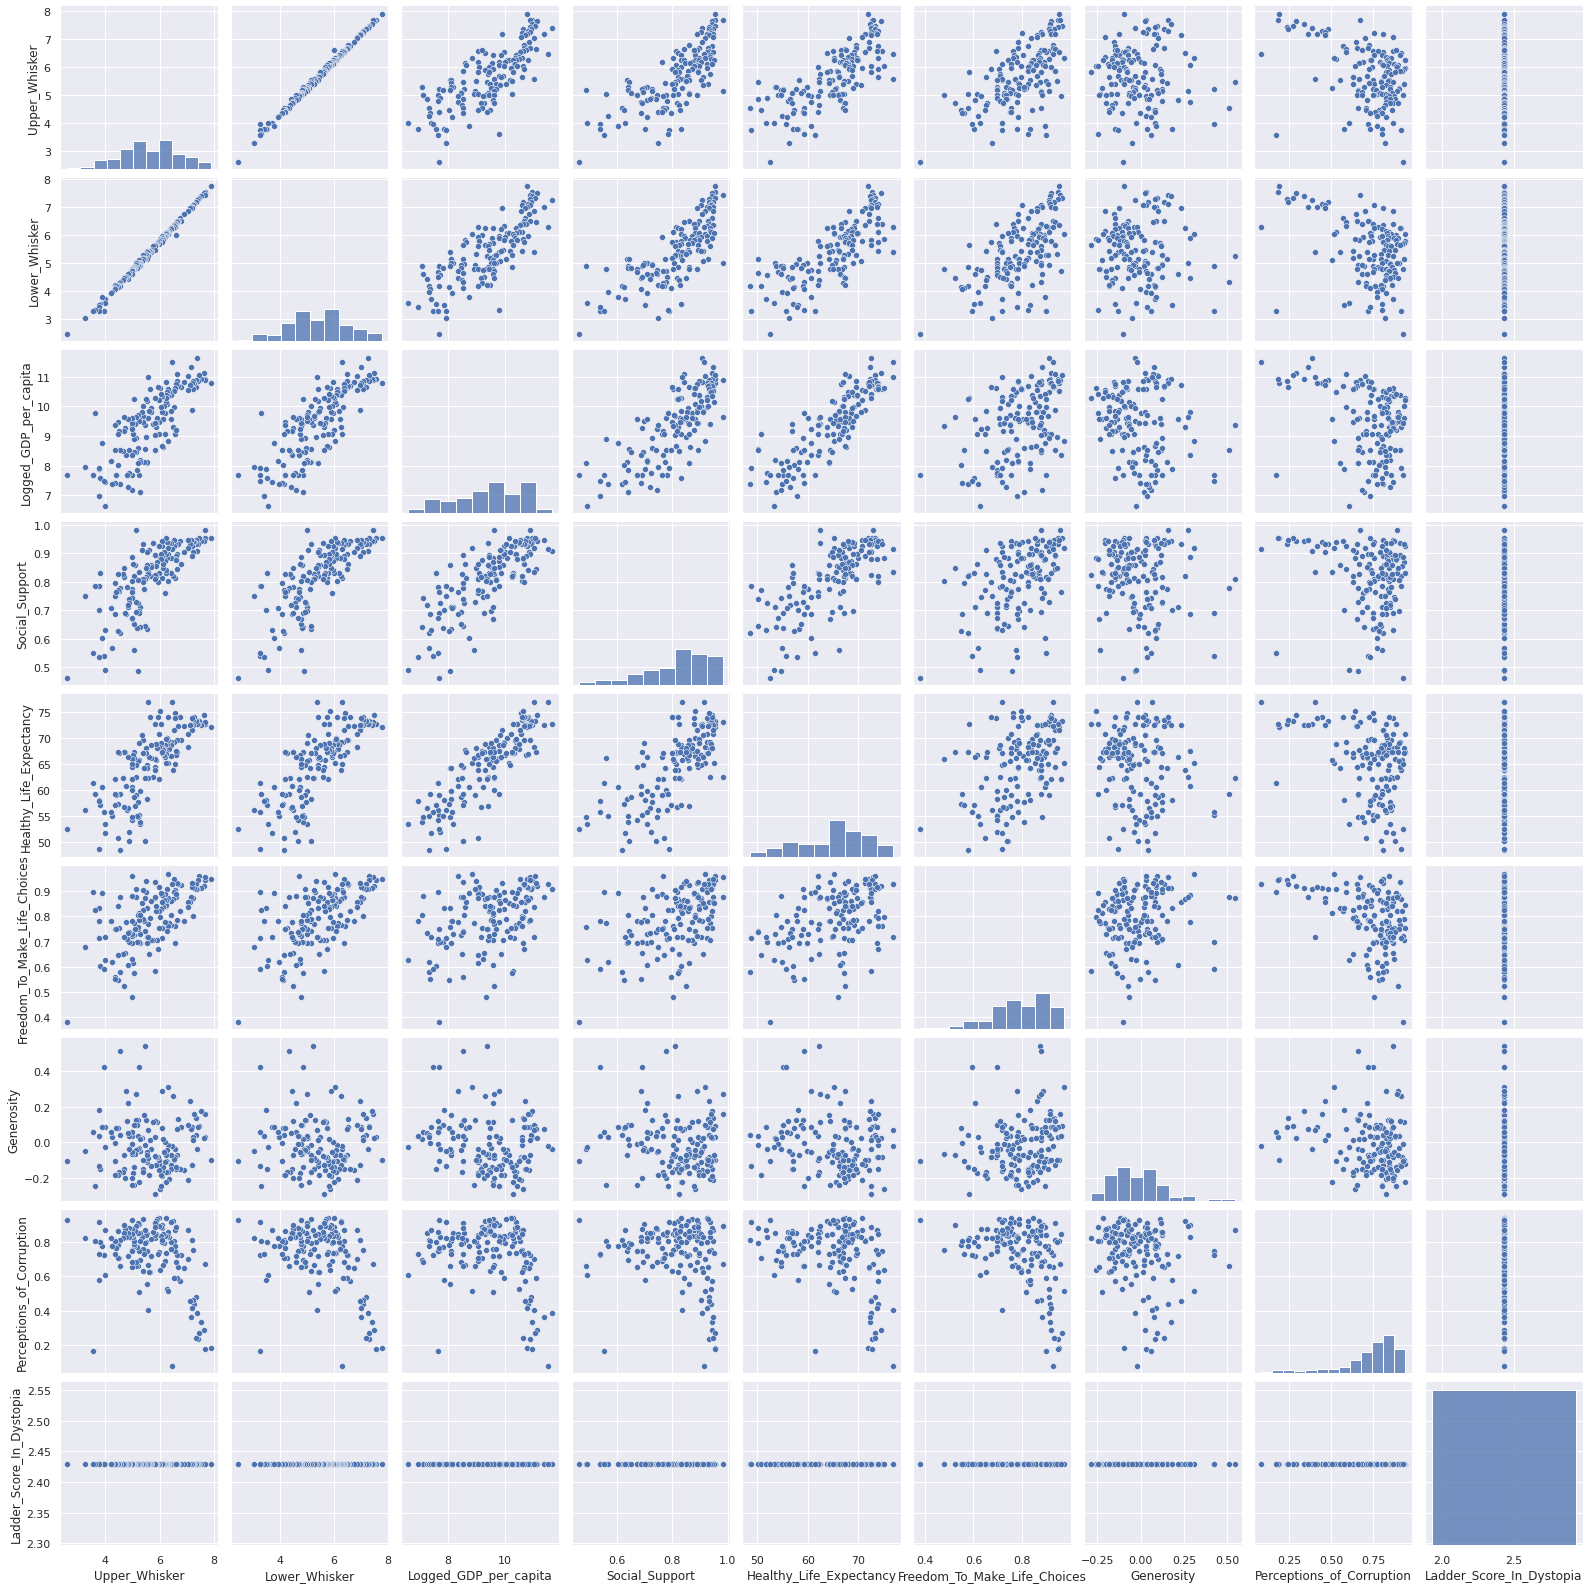

In [31]:
plt.figure(figsize=(10,7))

sns.pairplot(df_2021.drop('Ladder_Score', axis=1))

plt.show()

Here we are visualizing the features and their relationships with each other (without the dependent variable, ladder score) and we can see that there seems to be a positive correlation between some of the features, for example, social support and gdp.

<Figure size 720x504 with 0 Axes>

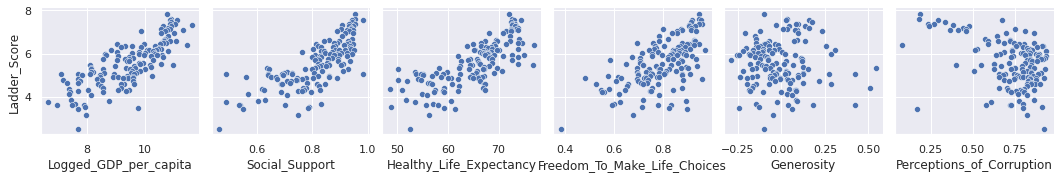

In [32]:
plt.figure(figsize=(10,7))

sns.pairplot(df_2021, x_vars=['Logged_GDP_per_capita', 'Social_Support', 'Healthy_Life_Expectancy', 
                         'Freedom_To_Make_Life_Choices', 'Generosity', 'Perceptions_of_Corruption'],
             y_vars=['Ladder_Score'], kind='scatter', diag_kind=None)

plt.show()

Here it looks like there is a positive correlation between the ladder score and the variables gdp, social support, life expectancy, freedom, and not really between generosity and corruption. We will use this to test some hypotheses.

In [33]:
# Lets look at the 10 countries with the highest life expectancy. 
df_2021.nlargest(10, columns="Healthy_Life_Expectancy")

,Country_Name,Regional_Indicator,Ladder_Score,Upper_Whisker,Lower_Whisker,Logged_GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Ladder_Score_In_Dystopia
31,Singapore,Southeast Asia,6.377,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43
76,Hong Kong S.A.R. of China,East Asia,5.477,5.573,5.380,11.000,0.836,76.820,0.717,0.067,0.403,2.43
55,Japan,East Asia,5.940,6.020,5.861,10.611,0.884,75.100,0.796,-0.258,0.638,2.43
26,Spain,Western Europe,6.491,6.574,6.408,10.571,0.932,74.700,0.761,-0.081,0.745,2.43
2,Switzerland,Western Europe,7.571,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43
20,France,Western Europe,6.690,6.762,6.618,10.704,0.942,74.000,0.822,-0.147,0.571,2.43
10,Australia,North America and ANZ,7.183,7.265,7.102,10.796,0.940,73.900,0.914,0.159,0.442,2.43
61,South Korea,East Asia,5.845,5.928,5.763,10.651,0.799,73.900,0.672,-0.083,0.727,2.43
38,Cyprus,Western Europe,6.223,6.319,6.128,10.576,0.802,73.898,0.763,-0.015,0.844,2.43
73,North Cyprus,Western Europe,5.536,5.636,5.435,10.576,0.820,73.898,0.795,0.012,0.626,2.43


We can see that the life expectancy is highest for Singapore, at 76.953 years, then Hong Kong, Japan, etc. 

In [34]:
# Now let's see the countries with the 10 lowest life expectancy, to compare. 
df_2021.nsmallest(10, columns="Healthy_Life_Expectancy")

,Country_Name,Regional_Indicator,Ladder_Score,Upper_Whisker,Lower_Whisker,Logged_GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Ladder_Score_In_Dystopia
127,Chad,Sub-Saharan Africa,4.355,4.540,4.171,7.364,0.619,48.478,0.579,0.041,0.807,2.43
144,Lesotho,Sub-Saharan Africa,3.512,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43
115,Nigeria,Sub-Saharan Africa,4.759,4.861,4.658,8.533,0.740,50.102,0.737,0.037,0.878,2.43
84,Ivory Coast,Sub-Saharan Africa,5.306,5.460,5.152,8.551,0.644,50.114,0.741,-0.016,0.794,2.43
129,Swaziland,Sub-Saharan Africa,4.308,4.448,4.168,9.065,0.770,50.833,0.647,-0.185,0.708,2.43
137,Sierra Leone,Sub-Saharan Africa,3.849,4.001,3.698,7.434,0.630,51.651,0.717,0.084,0.866,2.43
116,Mali,Sub-Saharan Africa,4.723,4.884,4.563,7.744,0.724,51.969,0.697,-0.036,0.827,2.43
148,Afghanistan,South Asia,2.523,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43
139,Burundi,Sub-Saharan Africa,3.775,3.985,3.565,6.635,0.490,53.400,0.626,-0.024,0.607,2.43
90,Cameroon,Sub-Saharan Africa,5.142,5.288,4.996,8.189,0.710,53.515,0.731,0.026,0.848,2.43


Chad has the lowest life expectancy at 48.478 years. 

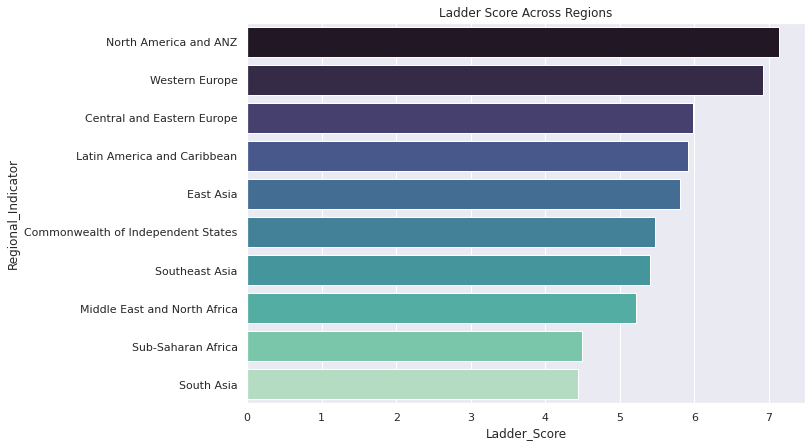

In [35]:
# Let's compare happiness scores across regions for 2021. 
region = df_2021.groupby(['Regional_Indicator'])['Ladder_Score'].mean()

region_df = pd.DataFrame(data=region)

reg = region_df.sort_values(by = 'Ladder_Score', ascending=False, axis = 0)

plt.figure(figsize=(10,7))

plt.title('Ladder Score Across Regions')

sns.barplot(x='Ladder_Score', y=reg.index, data=reg, palette = 'mako')

plt.show()

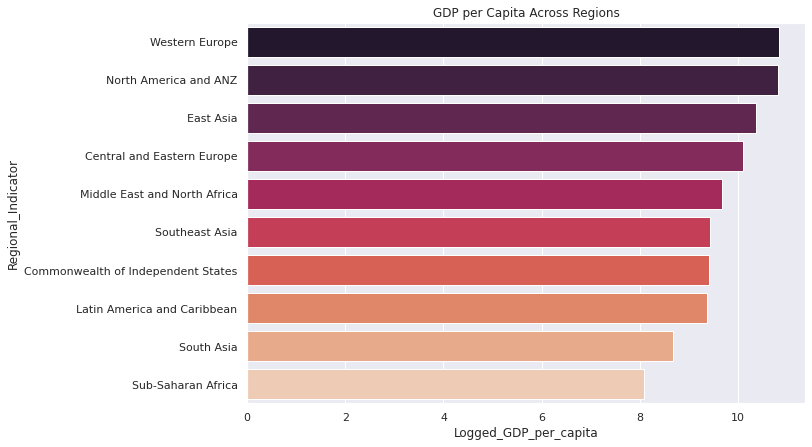

In [36]:
# Comparing GDP per Capita across different regions for 2021 dataset

region = df_2021.groupby(['Regional_Indicator'])['Logged_GDP_per_capita'].mean()

region_df = pd.DataFrame(data=region)

reg = region_df.sort_values(by='Logged_GDP_per_capita', ascending=False,axis=0)

plt.figure(figsize=(10,7))

plt.title('GDP per Capita Across Regions')

sns.barplot(x='Logged_GDP_per_capita', y=reg.index, data=reg, palette='rocket')

plt.show()

Multivariate Analysis

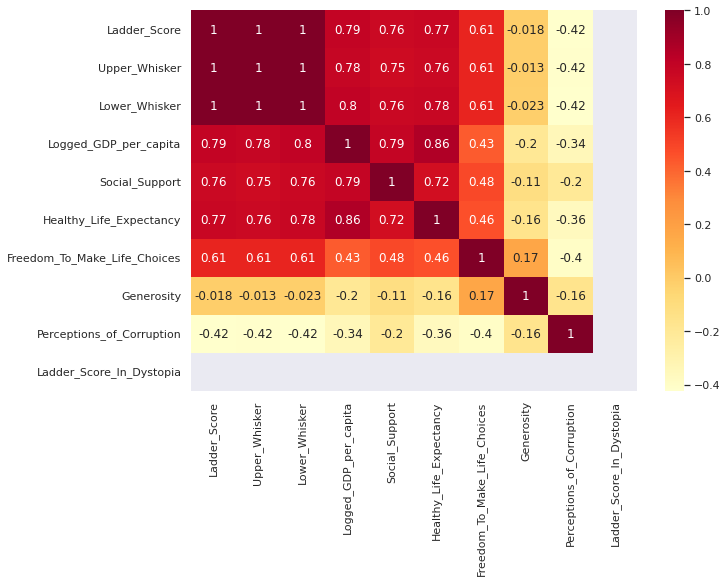

In [37]:
# We will construct a heatmap displaying the correlations between the features: 
plt.figure(figsize=(10,7))
sns.heatmap(df_2021.corr(), annot=True, cmap='YlOrRd')
plt.show()

Here we can see that there is a high correlation between ladder score and healthy life expectancy, social support, and logged gdp per capita, as well as (slightly lower) between ladder score and freedom. 

In [38]:
# Let's see the top ten happiest countries and least happiest countries in 2021: 


df_top = df_2021.head(10).sort_values('Ladder_Score', ascending = True)

px.bar(df_top, x='Ladder_Score', y='Country_Name',orientation='h',title="Top 10 Happiest Countries")

In [39]:


df_least= df_2021[-10:].sort_values('Ladder_Score', ascending = True)

px.bar(df_least, x='Ladder_Score', y='Country_Name',orientation='h',title="10 Least Happiest Countries")

In [40]:
# We can see that Finland is the happiest country and Afghanistan the least happy. 

Now we will try to develop a linear regression model using the method of least squares to predict happiness based on the features 

I hypothesize that gdp and life expectancy are the highest contributing strongly to the ladder score. 

* The null hypothesis (H_0) is that gdp and life expectancy do not contribute to the ladder score. 

* The alternative hypothesis (H_1) is that they do contribute to the ladder score. 

In [41]:
df_2021.columns

Index(['Country_Name', 'Regional_Indicator', 'Ladder_Score', 'Upper_Whisker',
       'Lower_Whisker', 'Logged_GDP_per_capita', 'Social_Support',
       'Healthy_Life_Expectancy', 'Freedom_To_Make_Life_Choices', 'Generosity',
       'Perceptions_of_Corruption', 'Ladder_Score_In_Dystopia'],
      dtype='object')

In [42]:
y = df_2021['Ladder_Score']
X = df_2021[['Logged_GDP_per_capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom_To_Make_Life_Choices', 'Generosity', 'Perceptions_of_Corruption']] 

# Splitting Test and Train Dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1234)

In [43]:
# Standardising the data

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [44]:
# Applying linear regression

lin_reg = LinearRegression()

lin_reg.fit(X_train,Y_train)

y_hat = lin_reg.predict(X_test)

score = lin_reg.score(X_test, Y_test)

mse = mean_squared_error(Y_test, y_hat)

mae = mean_absolute_error(Y_test, y_hat)

r2_lr = r2_score(Y_test, y_hat)

print("R-square value:", r2_lr)

print("\nMean Squared Error value:", mse)

print("\nMean Absolute Error value:", mae)

R-square value: 0.5600546527435308

Mean Squared Error value: 0.26553085477467797

Mean Absolute Error value: 0.39371186129266156


This means that 56% of the variation in happiness score can be explained by the features (gdp, social support, life expectancy, freedom, generosity, perceptions of corruption). 


Now we will test the hypothesis that there is a positive relationship between life expectancy and gdp and the ladder score. 



In [46]:
df_2021.columns

Index(['Country_Name', 'Regional_Indicator', 'Ladder_Score', 'Upper_Whisker',
       'Lower_Whisker', 'Logged_GDP_per_capita', 'Social_Support',
       'Healthy_Life_Expectancy', 'Freedom_To_Make_Life_Choices', 'Generosity',
       'Perceptions_of_Corruption', 'Ladder_Score_In_Dystopia'],
      dtype='object')

In [47]:
y = df_2021['Ladder_Score']
X = df_2021[['Logged_GDP_per_capita', 'Healthy_Life_Expectancy']] 

# Splitting Test and Train Dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1234)

In [48]:
# Standardising the data

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [49]:
# Applying linear regression

lin_reg = LinearRegression()

lin_reg.fit(X_train,Y_train)

y_hat = lin_reg.predict(X_test)

score = lin_reg.score(X_test, Y_test)

mse = mean_squared_error(Y_test, y_hat)

mae = mean_absolute_error(Y_test, y_hat)

r2_lr = r2_score(Y_test, y_hat)

print("R-square value:", r2_lr)

print("\nMean Squared Error value:", mse)

print("\nMean Absolute Error value:", mae)

R-square value: 0.35923522812418796

Mean Squared Error value: 0.3867362585982754

Mean Absolute Error value: 0.5022613232849124


Approximately 35.9% of the variation in the ladder score is explained by GDP and Life Expectancy. We will use statspy to see the individual contribution of each feature. 